## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
df = pd.read_csv("D:\INSAID\Fraud.csv", sep=',')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Exploring the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [5]:
df.shape

(1048575, 11)

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


## Data Cleaning

1. Searching and Counting the number of missing values

In [7]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

 2. Searching and Counting the number of duplicate values

In [8]:
df.duplicated().sum()

0

3. Evaluating Multicollinearity

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['step', 'amount', 'oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

          feature         VIF
0            step    1.339832
1          amount    1.833350
2   oldbalanceOrg  603.402550
3  newbalanceOrig  605.700260
4  oldbalanceDest   37.639461
5  newbalanceDest   40.318676


VIF starts at 1 and has no upper limit
VIF = 1, no correlation between the independent variable and the other variables
VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

Clearly, four columns i.e., oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest have very high values of VIF because 
new balance would be dependent on the old balance. So it would be better to drop one of (oldbalanceOrg & newbalanceOrig) and
(oldbalanceDest & newbalanceDest). 
So I am dropping newbalanceOrig and newbalanceDest.

In [10]:
df = df.drop(['newbalanceOrig','newbalanceDest'], axis = 1)

In [11]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,M1979787155,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,M2044282225,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,C553264065,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,C38997010,21182.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,M1230701703,0.0,0,0


3. Checking and Removing Outliers

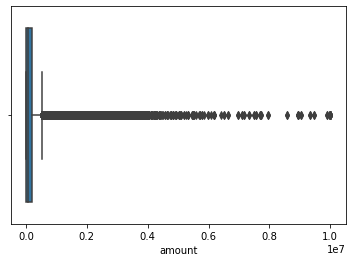

In [12]:
#sns.boxplot(data=df, x='amount')
ax = sns.boxplot(x=df["amount"])
#sns.boxplot(df['amount'])

In [13]:
Q1 = np.percentile(df['amount'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['amount'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR)

201612.825


In [14]:
print("Old Shape: ", df.shape)
# Upper bound
upper = np.where(df['amount'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['amount'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (1048575, 9)
New Shape:  (995487, 9)


## Exploratory Data Analysis

The provided data has the financial transaction data as well as the target variable isFraud, which is the actual fraud status of the transaction and isFlaggedFraud is the indicator which the simulation is used to flag the transaction using some threshold. 
From the hypothesis, isFraud is the indicator which indicates the actual fraud transactions whereas isFlaggedFraud is what the system prevents the transaction due to some thresholds being triggered.


In [15]:
class_data = df["isFraud"].value_counts()
print(class_data)
print('No Frauds', round(df['isFraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['isFraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

0    994808
1       679
Name: isFraud, dtype: int64
No Frauds 99.93 % of the dataset
Frauds 0.07 % of the dataset


Since there is high difference in the number of observations in Non Fraud and Fraud observations, this is an 
'Imbalanced Dataset'. 

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

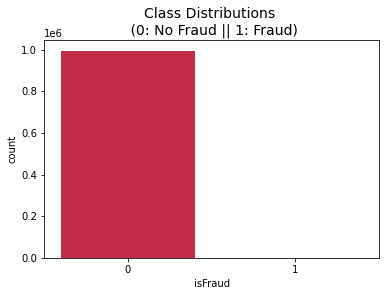

In [16]:
colors = ["crimson", "pink"]

sns.countplot('isFraud', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(1.0, 95.0)

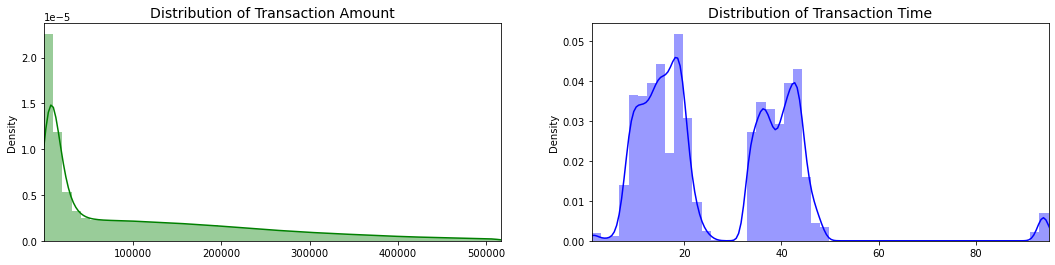

In [17]:
fig, ax =  plt.subplots(1, 2, figsize=(18,4))

amount_val = df['amount'].values
time_val = df['step'].values

sns.distplot(amount_val, ax=ax[0], color='g')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

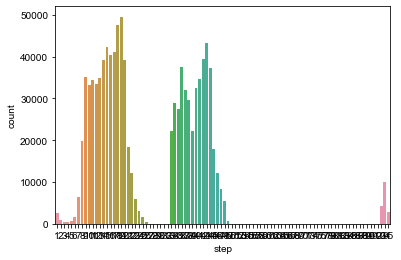

In [18]:
ax = sns.countplot(x="step", data=df)
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 501719.38)

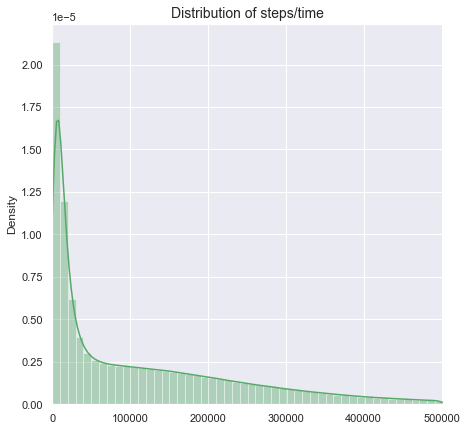

In [22]:
step_val = df['amount'].values
ax = sns.distplot(step_val, color='g')
ax.set_title('Distribution of steps/time', fontsize=14)
ax.set_xlim([min(step_val), max(step_val)])


In [19]:
df.corr()

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.023911,-0.008662,0.000302,0.030054,NaN
amount,-0.023911,1.000000,0.076277,0.231623,0.010787,NaN
oldbalanceOrg,-0.008662,0.076277,1.000000,0.106343,-0.006423,NaN
oldbalanceDest,0.000302,0.231623,0.106343,1.000000,-0.005850,NaN
isFraud,0.030054,0.010787,-0.006423,-0.005850,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN


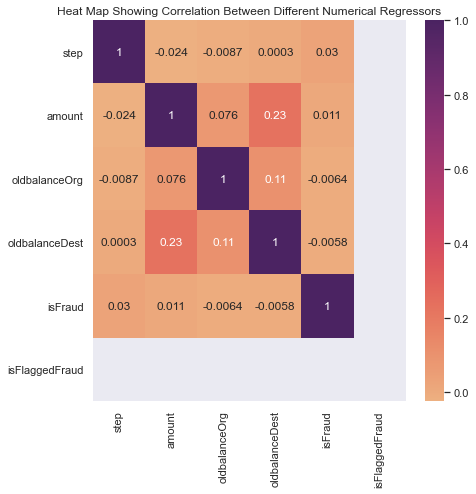

In [20]:
sns.heatmap(df.corr(),annot=True, cmap='flare')
plt.title('Heat Map Showing Correlation Between Different Numerical Regressors')
plt.show()

## Feature Engineering

1. Droping Name Columns

In [21]:
df = df.drop(['nameOrig','nameDest'], axis = 1)

In [22]:
df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,21182.0,1,0
4,1,PAYMENT,11668.14,41554.0,0.0,0,0


## Data Visualization

CASH_OUT    364041
PAYMENT     353873
CASH_IN     223351
TRANSFER     47045
DEBIT         7177
Name: type, dtype: int64


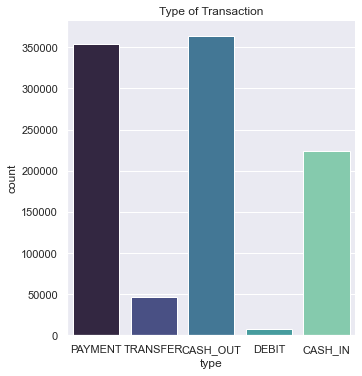

In [23]:
print(df.type.value_counts())
ax = sns.catplot(x='type',data=df, kind='count',palette='mako')
plt.title('Type of Transaction')
plt.show()

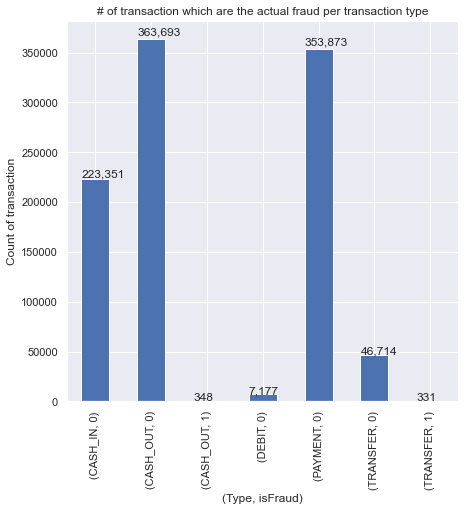

In [24]:
ax = df.groupby(['type', 'isFraud']).size().plot(kind='bar')
ax.set_title("# of transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))   

of the five types of transactions, fraud occurs only in two of them i.e., in 'TRANSFER' where money is sent to a customer / fraudster and in 'CASH_OUT' where money is sent to a merchant who pays the customer / fraudster in cash. Remarkably, the number of fraudulent TRANSFERs almost equals the number of fraudulent CASH_OUTs.

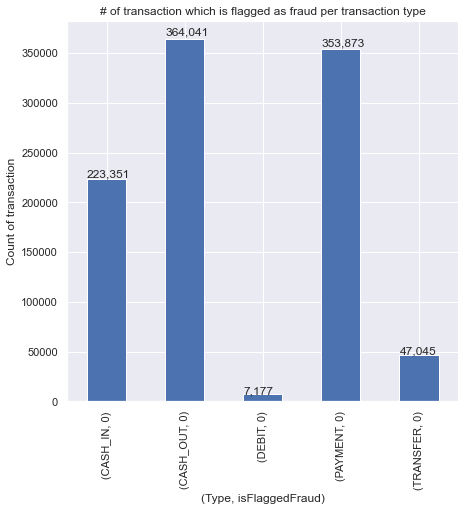

In [25]:
ax = df.groupby(['type', 'isFlaggedFraud']).size().plot(kind='bar')
ax.set_title("# of transaction which is flagged as fraud per transaction type")
ax.set_xlabel("(Type, isFlaggedFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

So it looks the simulation can flag only 16 transfer transactions as fraud.

## Dealing with imblanced dataset through Random Undersampling

In [26]:
df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,21182.0,1,0
4,1,PAYMENT,11668.14,41554.0,0.0,0,0


In [28]:
pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:
      Successfully uninstalled joblib-0.17.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2



In [29]:
from imblearn.under_sampling import RandomUnderSampler
X = df.drop(['isFraud', 'type', 'isFlaggedFraud'], axis = 1)
y = df.isFraud
rus = RandomUnderSampler(sampling_strategy= 0.8)
X_res, y_res = rus.fit_resample(X, y)
print(X_res.shape, y_res.shape)
print(pd.value_counts(y_res))

(1527, 4) (1527,)
0    848
1    679
Name: isFraud, dtype: int64


In [30]:
print(X_res)
print(y_res)

      step     amount  oldbalanceOrg  oldbalanceDest
0       40  314350.98           0.00      1079049.57
1       33  300888.98           0.00      1737308.95
2       12  418195.74      773286.51       176314.03
3       36  197327.20     1179065.73       445940.91
4       33  123547.24      235253.00       433774.92
...    ...        ...            ...             ...
1522    95   56745.14       56745.14        51433.88
1523    95   33676.59       33676.59            0.00
1524    95   33676.59       33676.59            0.00
1525    95   87999.25       87999.25            0.00
1526    95   87999.25       87999.25            0.00

[1527 rows x 4 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1522    1
1523    1
1524    1
1525    1
1526    1
Name: isFraud, Length: 1527, dtype: int64


In [31]:
train_data = pd.concat((X_res,y_res), axis = 1)
train_data.head()

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud
0,40,314350.98,0.00,1079049.57,0
1,33,300888.98,0.00,1737308.95,0
2,12,418195.74,773286.51,176314.03,0
3,36,197327.20,1179065.73,445940.91,0
4,33,123547.24,235253.00,433774.92,0


0    848
1    679
Name: isFraud, dtype: int64
Target Variables


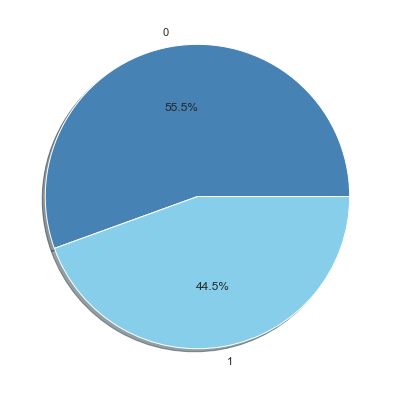

In [32]:
class_data= pd.value_counts(y_res)
print(class_data)

print('Target Variables')
#Visualization
plt.pie(class_data,labels=['0','1'],colors=['steelblue','skyblue'],shadow=True,autopct="%1.1f%%",radius=1)
plt.show()

## Train-Test Split

In [33]:
from sklearn.model_selection import train_test_split
X = train_data.drop(['isFraud'],axis=1)
y = train_data['isFraud']
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2 , random_state = 0)

## Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
X_train

array([[ 1.98809479,  1.06584743, -0.11880312, -0.39356984],
       [ 1.61224237, -0.37636783, -0.20818474, -0.39356984],
       [ 0.10883269,  2.22198731, -0.04715109, -0.39356984],
       ...,
       [ 0.48468511,  0.62903155, -0.14587489, -0.39356984],
       [-0.72639491, -0.82764659, -0.24624125, -0.30763958],
       [-0.80991767, -0.4827729 , -0.24615903, -0.24785576]])

## Training on Various Machine Learning Models

## 1. Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score
print(classification_report(y_test, y_pred))
print('accuracy', accuracy_score(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       173
           1       0.76      0.59      0.66       133

    accuracy                           0.74       306
   macro avg       0.74      0.72      0.72       306
weighted avg       0.74      0.74      0.73       306

accuracy 0.738562091503268


0.7209787474466512

## 2. Support Vector Machine

In [39]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [40]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score
print(classification_report(y_test, y_pred))
print('accuracy', accuracy_score(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.74      0.93      0.82       173
           1       0.86      0.57      0.69       133

    accuracy                           0.77       306
   macro avg       0.80      0.75      0.76       306
weighted avg       0.79      0.77      0.76       306

accuracy 0.7745098039215687


0.7510322047894302

## 3. Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier1.fit(X_train, y_train)
y_pred = classifier1.predict(X_test)

In [42]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier1, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.58 %
Standard Deviation: 3.27 %


In [43]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score
print(classification_report(y_test, y_pred))
print('accuracy', accuracy_score(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       173
           1       0.91      0.93      0.92       133

    accuracy                           0.93       306
   macro avg       0.93      0.93      0.93       306
weighted avg       0.93      0.93      0.93       306

accuracy 0.9313725490196079


0.9314833326089791

In [44]:
from sklearn.model_selection import GridSearchCV

parameters = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
grid_search = GridSearchCV(estimator = classifier1,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)    # decision tree model

Best Accuracy: 91.32 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 14}


## 4. Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)
y_pred = classifier2.predict(X_test)

In [46]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier2, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 92.79 %
Standard Deviation: 1.90 %


In [47]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score
print(classification_report(y_test, y_pred))
print('accuracy', accuracy_score(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       173
           1       0.90      0.92      0.91       133

    accuracy                           0.92       306
   macro avg       0.92      0.92      0.92       306
weighted avg       0.92      0.92      0.92       306

accuracy 0.9183006535947712


0.9181841887956886

In [48]:
from sklearn.model_selection import GridSearchCV

parameters = { "n_estimators": [5, 10, 15, 20, 25], 
    "max_depth": [3, 5, 7, 9, 11, 13],}
grid_search = GridSearchCV(estimator = classifier2,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)    # decision tree model

Best Accuracy: 93.04 %
Best Parameters: {'max_depth': 13, 'n_estimators': 25}


Hence the final Accuracy is ~ 95%

Answer 1:

It has been answered while performing the said techniques.

Answer 2:

Logistic Regression:
Logistic regression is a well-known classification method that has proved to be applicable in several fields. The goal of logistic regression is to model the posterior probability of K classes via a linear function in x, under the condition that they remain in [0,1] and sum up to one. It works on Sigmoid function resulting in a S-curve graph.

Support Vector Machine:
A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labelled training data for each category, they’re able to categorize new text. They work in a p-dimensional space where a hyperplane is used for classification purposes. The hyperplane is a p-1 dimensional plane.

Decision Tree:
Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too. The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from training data.

Random Forest:
Random forest is an extension of decision trees. Decision trees are easy to build and interpret but not particularly useful in practice. Generally, they work great with the data used to build them but are inaccurate when dealing with new samples. This problem is solved by assembling various decision trees into a forest through bagging, bootstrap aggregating, to acquire better predictions.

Answer 3:

The explanation is clear and given above during evaluation of multicollinearity, higher the VIF value, less accuracy for the regression models to perform.

Answer 4:
    
The results are given above

Answer 5:

The key factors that represent a fraudulent customer are high margin variations within the transaction history and trend.

Answer 6:

These factors do make sense because these are the basis of a fraud.

Answer 7:

THe basic prevention company can take is to manage and maintain a balanced dataset. The rest actions can be decided by the company itself.

Answer 8:

A balanced dataset always results much more accurate experiments and other decisions can be measured similarly.